## Pulsating Star Recovery metric ##

Metric Authors: Marcella Di Criscienzo, Silvio Leccia & Vittorio Braga

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline, get_data_dir

In [6]:
opsdb = get_baseline()
runName = os.path.split(opsdb)[-1].replace('.db', '')
print(runName)

baseline_v2.1_10yrs


The PulsatingStarRecovery metric takes an input lightcurve of a variable star, creates observations as would be achieved from opsim, adds noise, and then uses gatspy multi-band fitting to try to fit the lightcurve. 
If a stellar catalog is provided, the lightcurve will be evaluated in the presence of blending with the background sources. 

The metric is currently only run at a few spots on the sky and for a limited amount of time. 

In [28]:
test_ra = 270.8839167
test_dec = -30.0352667

In [25]:
# Build the background catalog from TRILEGAL.
# We'll store this in rubin_sim_data. 

import dl.queryClient as qc

table = 'lsst_sim.simdr2'

radius = 0.0002
query = ("select ra,dec,umag,gmag, rmag, imag, zmag, ymag, mu0, gc, mass from {} "\
         "where q3c_radial_query(ra, dec, {}, {}, {})".format(table, test_ra, test_dec, radius))
df = qc.query(sql=query ,timeout=1000, fmt='pandas') 
print(len(df))
df.to_hdf(f'simdr2_{test_ra:.1f}_{test_dec:.1f}.hdf', 'simdr2')

4


In [26]:
pd.read_hdf(f'simdr2_{test_ra:.1f}_{test_dec:.1f}.hdf')

,ra,dec,umag,gmag,rmag,imag,zmag,ymag,mu0,gc,mass
0,270.883756,-30.035409,29.475,26.248,24.683,23.300,22.587,22.217,14.35,4,0.607
1,270.883803,-30.035364,28.944,25.712,24.158,22.791,22.088,21.724,13.90,4,0.611
2,270.883866,-30.035426,24.411,21.688,20.454,19.935,19.599,19.417,15.05,4,1.042
3,270.884056,-30.035187,31.878,28.551,26.807,25.606,24.941,24.603,16.00,1,0.466


Potentially, you could run this metric at a series of points over the sky, and download additional versions of the data file (or if you run with a live connection, connect and query at each point). OR you could run the metric with 'deblend' off, so you don't need the stellar catalog information.
We currently have the test catalog created above in `$RUBIN_SIM_DATA_DIR/maf/pulsatingStars/simdr2_270.9_-30.0.hdf`, and it will be used as the default is `do_deblend` is set in the metric.

In [29]:
slicer = maf.UserPointsSlicer(test_ra, test_dec)

# While we're here, let's get the opsim data and set up this slicer 
# .. that way we have the visit info available to play with and show sampled lightcurve

simData = maf.getMetricData()

In [115]:
tt = np.array([1, 3, np.nan])
mm = np.array([0, 2, 3])
np.where(mm < tt)

(array([0, 1]),)

The metric also needs a variable star light curve template. There are currently several available in `$RUBIN_SIM_DATA_DIR/maf/pulsatingStars`. 

['CEF1.csv', 'CEF2.csv', 'LPV1.csv', 'LPV2.csv', 'README.md', 'RRab.csv', 'RRc.csv', 'simdr2_270.9_-30.0.hdf']


Text(0, 0.5, 'magnitudes')

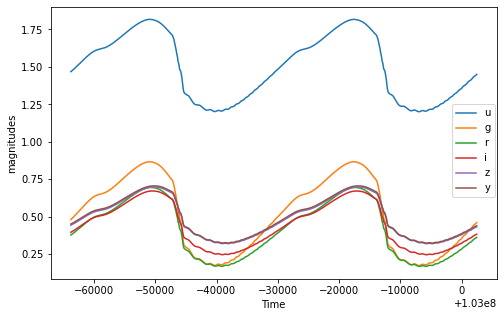

In [75]:
# See what's available and show an example (of the default)
print(sorted(os.listdir(os.path.join(get_data_dir(), 'maf/pulsatingStars'))))

variable_lc = os.path.join(get_data_dir(), 'maf/pulsatingStars', 'RRc.csv')

lc = pd.read_csv(variable_lc)
# Modify period to seconds
lc['period']  = lc['P'] * 24*60*60
lc = lc.drop('P', axis=1)
# Add a phased version of the time
lc['phase'] = (lc['time'] - lc['time'][0]) / lc['period'] % 1
# Rename the columns
name_mapper = {f'{f}_lsst': f'{f}' for f in 'ugrizy'}
lc.rename(columns=name_mapper, inplace=True)

fig = plt.figure(figsize=(8,5))
for k in 'ugrizy':
    plt.plot(lc['time'], lc[k], label=k)
plt.legend(loc=(0.9, 0.3))
plt.xlabel('Time')
plt.ylabel('magnitudes')

In [23]:
metric = #parameters that must be inserted to run the metric PulsatingStarRecovery.py.Possible filenames are (https://github.com/MARCELLADC/PulsatingStarRecovery):
#filename='./RRab.csv'
#filename='./RRc.csv'
#filename='./CEF1.csv'
#filename='./CEF2.csv'
#filename='./LPV1.csv'
#filename='./LPV2.csv'
filename='./RRc.csv'   #ascii file with the template of pulsating star
dmod=14.5    #distance modulus
sigmaFORnoise=1   # sigma for the computation of the error on the magnitude
do_remove_saturated=True    #Remove from temporal series saurated visits  
factorForDimensionGap=0.5  #parameter used in LcSampling 
numberOfHarmonics=3         #parameter used in LcFitting--suggested value for a RRC





mymetric = maf.PulsatingStarRecovery(filename,dmod,sigmaFORnoise,do_remove_saturated,numberOfHarmonics,factorForDimensionGap)

AttributeError: 'UserPointsSlicer' object has no attribute 'pixarea'